# Задача про Складские Краны

## Импорт модулей

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Входные данные

Cклад состоит из одной складской зоны, на которой работают 4  складских кран. Складская зона делится на 3 складских блока. Каждый складской блок состоит из 40 слотов. Слот - это участок, на который может быть размещён грузовой контейнер

In [ ]:
n = 60 # Количество работ ( которые надо выполнить за один час)
m = 4 # Количесвто кранов
teta = 40 # Количество слотов в складском блоке
q_blocks = 3 # Количество складских блоков
h = 4 # Время выполнения работы (4 минуты)
size_P = 50 # Начальный размер популяции
loc_cranes = [15,45,75,105] # Начальное местоположение кранов

jobs = np.arange(1,n+1) # Работы

print(f'Количество работ: {n}')
print(f'Количесвто кранов: {m}')
print(f'Количество слотов в складском блоке: {teta}')
print(f'Количество складских блоков: {q_blocks}')
print(f'Фиксированное время выполнения работы: {h}')
print(f'Начальный размер популяции: {size_P}')

Количество работ: 60
Количесвто кранов: 4
Количество слотов в складском блоке: 40
Количество складских блоков: 3
Фиксированное время выполнения работы: 4
Начальный размер популяции: 50


У каждой работы имеются следующие характеристики:

1.   l - Местоположение работы (номер слота)
2.   r - Время готовности работы (интерпретируется как время прибытия грузовика с контенером)
3.   t - время прибытия складского крана на соответствующую работу
4.   S - время начала выполнения работы
5.   D - время завершения выполнения работы

Определим список, который генерирует местоположение каждой работы:







In [ ]:
l = np.random.randint(0, teta*q_blocks, size=n)
l

array([ 25,  18,  65, 100,  28,  35,  83,   2,  85,  30,  10,  93,  67,
        80,  26,  69,  47,  50,  43,  25,  88,  65, 113,  69, 103,  65,
        17,  63,  87,  43,  84,  35,  26, 119,   0,  24,  26, 117,  53,
        59,   5,  39,  22,  64,  70, 108,  23,   1, 118,  22,  90,  45,
       112,  42,  51,  64,  26,  67,  96, 118])

Определим список, который генерирет время готовности каждой работы:

In [ ]:
r1 = np.random.exponential(scale=4/m, size=n)
r = np.array([r1[0:i].sum() for i in np.arange(1,n+1)])
r

array([ 0.74394761,  0.78902034,  3.14900823,  3.59937304,  4.5079105 ,
        8.68630349,  9.04374972,  9.54503717,  9.94585251, 10.8190751 ,
       11.34586173, 12.41372472, 12.61177618, 15.79231025, 16.24003804,
       18.56411992, 18.82423719, 19.17883758, 20.50960956, 20.66739456,
       22.10111636, 24.83797479, 25.38468313, 25.44681964, 25.83839948,
       28.70374102, 29.72584675, 30.65332584, 32.37475928, 33.86270637,
       35.49471639, 36.73416008, 36.89429775, 37.55827854, 39.26762135,
       41.86530371, 42.15097815, 42.98226695, 43.56512712, 43.92030363,
       44.2311524 , 44.57048035, 44.87742185, 45.32068371, 46.55354555,
       46.55790931, 47.42399024, 50.63447573, 51.37897365, 51.8425002 ,
       52.19420996, 53.09461076, 54.24482904, 54.73036714, 58.87624732,
       59.16938289, 59.19460648, 60.03219643, 60.51032455, 61.69073857])

Обратим внимание, что в r1 хранится время ожидания новой работы

In [ ]:
r1 = np.around(r1, 5)
r1

array([0.74395, 0.04507, 2.35999, 0.45036, 0.90854, 4.17839, 0.35745,
       0.50129, 0.40082, 0.87322, 0.52679, 1.06786, 0.19805, 3.18053,
       0.44773, 2.32408, 0.26012, 0.3546 , 1.33077, 0.15779, 1.43372,
       2.73686, 0.54671, 0.06214, 0.39158, 2.86534, 1.02211, 0.92748,
       1.72143, 1.48795, 1.63201, 1.23944, 0.16014, 0.66398, 1.70934,
       2.59768, 0.28567, 0.83129, 0.58286, 0.35518, 0.31085, 0.33933,
       0.30694, 0.44326, 1.23286, 0.00436, 0.86608, 3.21049, 0.7445 ,
       0.46353, 0.35171, 0.9004 , 1.15022, 0.48554, 4.14588, 0.29314,
       0.02522, 0.83759, 0.47813, 1.18041])

Теперь необходимо связать исходные данные для этого определим следующие переменные:

In [ ]:
jobs_and_l = np.vstack((jobs, l)).T

In [ ]:
jobs_and_r = np.vstack((jobs, r)).T

In [ ]:
jobs_and_r_and_l = np.vstack((jobs, r, l)).T

In [ ]:
jobs_and_r1 = np.vstack((jobs, r1)).T
jobs_and_r1

array([[1.00000e+00, 7.43950e-01],
       [2.00000e+00, 4.50700e-02],
       [3.00000e+00, 2.35999e+00],
       [4.00000e+00, 4.50360e-01],
       [5.00000e+00, 9.08540e-01],
       [6.00000e+00, 4.17839e+00],
       [7.00000e+00, 3.57450e-01],
       [8.00000e+00, 5.01290e-01],
       [9.00000e+00, 4.00820e-01],
       [1.00000e+01, 8.73220e-01],
       [1.10000e+01, 5.26790e-01],
       [1.20000e+01, 1.06786e+00],
       [1.30000e+01, 1.98050e-01],
       [1.40000e+01, 3.18053e+00],
       [1.50000e+01, 4.47730e-01],
       [1.60000e+01, 2.32408e+00],
       [1.70000e+01, 2.60120e-01],
       [1.80000e+01, 3.54600e-01],
       [1.90000e+01, 1.33077e+00],
       [2.00000e+01, 1.57790e-01],
       [2.10000e+01, 1.43372e+00],
       [2.20000e+01, 2.73686e+00],
       [2.30000e+01, 5.46710e-01],
       [2.40000e+01, 6.21400e-02],
       [2.50000e+01, 3.91580e-01],
       [2.60000e+01, 2.86534e+00],
       [2.70000e+01, 1.02211e+00],
       [2.80000e+01, 9.27480e-01],
       [2.90000e+01,

## Создание популяции

Каждый индивид представляется в виде хромосомы, которая состоит из двх частей:


1.   В первой части мы просто перемешиваем работы в случайном порядке;
2.   Во второй части каждому крану соответсвет число работ, который данный кран будет выполнять сумма всех этих чисел должна равняться n.

Для начала создадим фнкцию, которая создаёт индивида:



In [ ]:
def create_individ(jobs, n, m):
  jobs1 = np.arange(1,61)
  np.random.shuffle(jobs1) # Перемешиваем работы (первая часть хромосомы)
  a = np.random.randint(12,19, size=m-1) # Генерируем первые 3 числа работ для первых 3 кранов
  a = np.append(a, n-a.sum()) # Добавляем количество работ для четвёртого крана
  return [jobs1, a]

In [ ]:
create_individ(jobs, n, m)

[array([28, 53, 16, 46, 23, 33, 58, 37, 17, 31, 20, 55, 32, 22, 29, 27, 42,
        19,  8, 15, 49, 51, 26, 54, 30, 14, 44,  2,  1, 60,  6, 21, 24,  4,
        12, 57, 48, 18, 43,  9,  3,  7, 40,  5, 59, 52, 36, 13, 25, 45, 11,
        50, 34, 35, 10, 39, 38, 47, 56, 41]),
 array([17, 13, 13, 17])]

Теперь создадим функцию, которая создаёт популяцию:

In [ ]:
def create_population(size_P, jobs, n, m):
  return [create_individ(jobs, n, m) for i in np.arange(size_P)]

In [ ]:
Spopulation = create_population(size_P, jobs, n, m)
Spopulation

[[array([17, 28, 41, 23, 25, 15, 33, 55, 42, 31,  6, 19,  2, 10,  8, 18,  5,
         13,  3,  4, 51, 45, 21,  7, 47, 26, 24, 35, 52, 32, 34, 11, 38, 12,
         37, 43, 57, 58,  9, 46, 39, 30, 56, 44, 50, 54, 53, 29, 36, 40, 27,
         59, 16,  1, 22, 49, 20, 60, 48, 14]),
  array([12, 13, 17, 18])],
 [array([32, 20,  5, 37,  7, 52, 30, 34, 60, 14, 31,  2,  3, 35, 24, 39, 50,
         36, 51, 26, 25, 17,  6, 44, 43, 48, 38, 58, 16, 46, 57, 41, 47,  9,
         55,  4, 27, 18,  1, 21, 12, 54, 40, 33, 29, 59,  8, 42, 11, 15, 23,
         22, 13, 45, 28, 19, 53, 56, 10, 49]),
  array([17, 15, 12, 16])],
 [array([60, 26, 58, 43, 39, 27, 33, 10,  6, 54, 47, 29, 53, 18, 20,  8, 22,
         36, 51, 57, 23, 17, 59, 13, 38,  9, 45,  7, 32, 40,  1, 35, 44, 52,
          3, 21,  4, 41, 48, 42, 34, 56, 16,  5, 46, 25,  2, 31, 12, 37, 28,
         50, 55, 30, 24, 11, 14, 15, 19, 49]),
  array([17, 12, 13, 18])],
 [array([30, 37,  9, 38,  4,  7, 42, 49, 34, 15, 23, 46, 14, 47, 18, 44, 25,
     

Выше можно наблюдать популяцию и её структуру. Каждый элемент популяции состоит из двух частей, что также обговаривалось выше

In [ ]:
individ = Spopulation[30]
individ

[array([23, 14, 27, 34,  1, 26, 58, 49, 50, 43, 38, 51, 39, 21, 29, 37, 45,
        56, 12, 30,  7, 18,  5, 55, 15, 46,  2, 57,  6, 16, 25, 53, 60,  4,
        48, 35, 40, 10, 47, 13,  9, 44, 33,  8, 59, 52, 36, 28, 41, 22, 11,
        24,  3, 20, 32, 42, 31, 17, 19, 54]),
 array([16, 17, 17, 10])]

## Функции для вычисления характеристик работ

Для начала опишем функцию, которая упорядочит местоположения работ для каждого крана. Так как мы их перемешали, каждый кран выполняет работы не в том порядке:

In [ ]:
def get_new_l(jobs_and_l, individ):
  '''Данная функция упорядочивает местоположения работ после того, как мы перемешали работы'''

  # Первая часть упорядочиваем местоположения работ для каждого крана:
  for_range = np.insert(individ[1], 0, 0)
  for_range = np.array([for_range[0:i].sum() for i in range(1,len(for_range)+1)])
  jobs_for_each_crane = []
  for i in range(len(for_range)-1):
    jobs_for_crane = individ[0][for_range[i]:for_range[i+1]] # Для каждого крана изымаем локацию
    jobs_for_crane.sort()
    jobs_for_each_crane.append(jobs_for_crane)

  temp = np.array([])
  for jobs_for_crane in jobs_for_each_crane:
    temp = np.append(temp, jobs_for_crane)
  individ[0] = np.int16(temp)


  # Вторая часть упорядочивания местоположения работ
  for_range = np.insert(individ[1], 0, 0)
  for_range = np.array([for_range[0:i].sum() for i in range(1,len(for_range)+1)])
  ls_for_each_crane = []
  for i in range(len(for_range)-1):
    l_for_crane = l[for_range[i]:for_range[i+1]] # Для каждого крана изымаем локацию
    l_for_crane.sort()
    ls_for_each_crane.append(l_for_crane)

  new_l = []
  for job in individ[0]:
    new_l.append(jobs_and_l[np.argwhere(jobs_and_l==np.array([job, None]))[0][0]][1])

  return np.array(new_l)

In [ ]:
get_new_l(jobs_and_l, Spopulation[45])

array([ 18,  30,  47,  88, 113,  69,  24,  26,  59, 118,  45,  64,  26,
        80,  69,  50,  65,  17, 119,   0, 117,  64,  23,   1,  90, 112,
        42,  65, 100,   2,  10,  25,  65, 103,  63,  43,  35,  26,  22,
        70, 108,  51,  67,  96, 118,  25,  28,  35,  83,  85,  93,  67,
        26,  43,  87,  84,  53,   5,  39,  22])

In [ ]:
def get_ls_for_each_crane(jobs_and_l, individ, l):
  '''Возвращает местоположение работ для каждого крана'''

  l = get_new_l(jobs_and_l, individ) # Упорядочиваем расположения работы после перемешивания работы
  for_range = np.insert(individ[1], 0, 0)
  for_range = np.array([for_range[0:i].sum() for i in range(1,len(for_range)+1)])
  ls_for_each_crane = []
  for i in range(len(for_range)-1):
    l_for_crane = l[for_range[i]:for_range[i+1]] # Для каждого крана изымаем локацию
    ls_for_each_crane.append(l_for_crane)
  return ls_for_each_crane

In [ ]:
ls_for_each_crane = get_ls_for_each_crane(jobs_and_l, individ, l)
ls_for_each_crane

[array([ 25,  80,  88, 113,  65,  17,  87, 119,  26, 117,  53,  22, 118,
         22,  90,  67]),
 array([ 18,  28,  35,  83,  93,  26,  69,  50, 103,  43,  70, 108, 112,
         51,  64,  26, 118]),
 array([100,   2,  85,  30,  67,  65,  63,  26,   0,  24,  59,   5,  64,
         23,   1,  45,  96]),
 array([65, 10, 47, 43, 25, 69, 84, 35, 39, 42])]

In [ ]:
def get_ds_for_each_crane(ls_for_each_crane, loc_cranes):
  '''Возвращает список для каждого крана. Каждый подсписок содержит время для перемещения с одной работы на следующую (тут говорится про работы назначенные крану)'''
  for i in range(len(ls_for_each_crane)):
    ls_for_each_crane[i] = np.insert(ls_for_each_crane[i], 0, loc_cranes[i]) # Здесь мы добавляем начальное положение кранов, так как они должны приехать на первю работу
  ds_for_each_crane = []
  for l_for_crane in ls_for_each_crane:
    ds_for_each_crane.append(np.array([3*np.abs(l_for_crane[i]-l_for_crane[i+1])/60 for i in range(len(l_for_crane)-1)])) # Делим на 60, чтобы перевести секунды в минуты
  return ds_for_each_crane

In [ ]:
ds_for_each_crane = get_ds_for_each_crane(ls_for_each_crane, loc_cranes)
ds_for_each_crane

[array([0.5 , 2.75, 0.4 , 1.25, 2.4 , 2.4 , 3.5 , 1.6 , 4.65, 4.55, 3.2 ,
        1.55, 4.8 , 4.8 , 3.4 , 1.15]),
 array([1.35, 0.5 , 0.35, 2.4 , 0.5 , 3.35, 2.15, 0.95, 2.65, 3.  , 1.35,
        1.9 , 0.2 , 3.05, 0.65, 1.9 , 4.6 ]),
 array([1.25, 4.9 , 4.15, 2.75, 1.85, 0.1 , 0.1 , 1.85, 1.3 , 1.2 , 1.75,
        2.7 , 2.95, 2.05, 1.1 , 2.2 , 2.55]),
 array([2.  , 2.75, 1.85, 0.2 , 0.9 , 2.2 , 0.75, 2.45, 0.2 , 0.15])]

Теперь определим функцию, которая будет возвращать время прибытия дворового крана на работу i:

In [ ]:
def get_ts_for_each_crane(ds_for_each_crane, h):
  '''Возвращает список для каждого крана. Каждый список содержит элементы (время прибытия дворового крана на каждую назначенную работу)'''

  ts_for_each_crane = []
  for ds_for_crane in ds_for_each_crane:
    ts_for_each_crane.append(np.array([ds_for_crane[0:i].sum()+(i-1)*h for i in range(1,len(ds_for_crane)+1)]))

  return ts_for_each_crane

In [ ]:
ts_for_each_crane = get_ts_for_each_crane(ds_for_each_crane, h)
ts_for_each_crane

[array([  0.5 ,   7.25,  11.65,  16.9 ,  23.3 ,  29.7 ,  37.2 ,  42.8 ,
         51.45,  60.  ,  67.2 ,  72.75,  81.55,  90.35,  97.75, 102.9 ]),
 array([ 1.35,  5.85, 10.2 , 16.6 , 21.1 , 28.45, 34.6 , 39.55, 46.2 ,
        53.2 , 58.55, 64.45, 68.65, 75.7 , 80.35, 86.25, 94.85]),
 array([ 1.25, 10.15, 18.3 , 25.05, 30.9 , 35.  , 39.1 , 44.95, 50.25,
        55.45, 61.2 , 67.9 , 74.85, 80.9 , 86.  , 92.2 , 98.75]),
 array([ 2.  ,  8.75, 14.6 , 18.8 , 23.7 , 29.9 , 34.65, 41.1 , 45.3 ,
        49.45])]

Проделаем похожий алгоритм действием с временем готовности:

In [ ]:
def get_new_r(jobs_and_r, individ):
  '''Данная функция упорядочивает местоположения работ после того, как мы перемешали работы'''
  new_r = []
  for job in individ[0]:
    new_r.append(jobs_and_r[np.argwhere(jobs_and_r==np.array([job, None]))[0][0]][1])

  return np.array(new_r)

In [ ]:
get_new_r(jobs_and_r, individ)

array([ 0.74394761, 15.79231025, 22.10111636, 25.38468313, 28.70374102,
       29.72584675, 32.37475928, 37.55827854, 42.15097815, 42.98226695,
       43.56512712, 44.87742185, 51.37897365, 51.8425002 , 52.19420996,
       60.03219643,  0.78902034,  4.5079105 ,  8.68630349,  9.04374972,
       12.41372472, 16.24003804, 18.56411992, 19.17883758, 25.83839948,
       33.86270637, 46.55354555, 46.55790931, 54.24482904, 58.87624732,
       59.16938289, 59.19460648, 61.69073857,  3.59937304,  9.54503717,
        9.94585251, 10.8190751 , 12.61177618, 24.83797479, 30.65332584,
       36.89429775, 39.26762135, 41.86530371, 43.92030363, 44.2311524 ,
       45.32068371, 47.42399024, 50.63447573, 53.09461076, 60.51032455,
        3.14900823, 11.34586173, 18.82423719, 20.50960956, 20.66739456,
       25.44681964, 35.49471639, 36.73416008, 44.57048035, 54.73036714])

In [ ]:
def get_rs_for_each_crane(jobs_and_r, individ, r):
  '''Возвращает время за которое дворовой кран проходит расстояние с li до lj'''

  r = get_new_r(jobs_and_r, individ) # Упорядочиваем время готовности работ после перемешивания работы
  for_range = np.insert(individ[1], 0, 0)
  for_range = np.array([for_range[0:i].sum() for i in range(1,len(for_range)+1)])
  rs_for_each_crane = []
  for i in range(len(for_range)-1):
    r_for_crane = r[for_range[i]:for_range[i+1]] # Для каждого крана изымаем локацию
    rs_for_each_crane.append(r_for_crane)
  return rs_for_each_crane

In [ ]:
rs_for_each_crane = get_rs_for_each_crane(jobs_and_r, individ, r)
rs_for_each_crane

[array([ 0.74394761, 15.79231025, 22.10111636, 25.38468313, 28.70374102,
        29.72584675, 32.37475928, 37.55827854, 42.15097815, 42.98226695,
        43.56512712, 44.87742185, 51.37897365, 51.8425002 , 52.19420996,
        60.03219643]),
 array([ 0.78902034,  4.5079105 ,  8.68630349,  9.04374972, 12.41372472,
        16.24003804, 18.56411992, 19.17883758, 25.83839948, 33.86270637,
        46.55354555, 46.55790931, 54.24482904, 58.87624732, 59.16938289,
        59.19460648, 61.69073857]),
 array([ 3.59937304,  9.54503717,  9.94585251, 10.8190751 , 12.61177618,
        24.83797479, 30.65332584, 36.89429775, 39.26762135, 41.86530371,
        43.92030363, 44.2311524 , 45.32068371, 47.42399024, 50.63447573,
        53.09461076, 60.51032455]),
 array([ 3.14900823, 11.34586173, 18.82423719, 20.50960956, 20.66739456,
        25.44681964, 35.49471639, 36.73416008, 44.57048035, 54.73036714])]

Теперь определим функцию, которая будет возвращать время, в которое дворовой кран приступает к работе:

In [ ]:
def get_S_for_each_crane(rs_for_each_crane, ts_for_each_crane):
  '''Данная функция возвращает время в которое каждый кран, начинает каждую свою работу'''
  s_for_each_crane = []
  for j in range(len(rs_for_each_crane)):
    s_for_each_crane.append(np.array([max([rs_for_each_crane[j][i],ts_for_each_crane[j][i]]) for i in range(len(rs_for_each_crane[j]))]))
  return s_for_each_crane

In [ ]:
s_for_each_crane = get_S_for_each_crane(rs_for_each_crane, ts_for_each_crane)
s_for_each_crane

[array([  0.74394761,  15.79231025,  22.10111636,  25.38468313,
         28.70374102,  29.72584675,  37.2       ,  42.8       ,
         51.45      ,  60.        ,  67.2       ,  72.75      ,
         81.55      ,  90.35      ,  97.75      , 102.9       ]),
 array([ 1.35,  5.85, 10.2 , 16.6 , 21.1 , 28.45, 34.6 , 39.55, 46.2 ,
        53.2 , 58.55, 64.45, 68.65, 75.7 , 80.35, 86.25, 94.85]),
 array([ 3.59937304, 10.15      , 18.3       , 25.05      , 30.9       ,
        35.        , 39.1       , 44.95      , 50.25      , 55.45      ,
        61.2       , 67.9       , 74.85      , 80.9       , 86.        ,
        92.2       , 98.75      ]),
 array([ 3.14900823, 11.34586173, 18.82423719, 20.50960956, 23.7       ,
        29.9       , 35.49471639, 41.1       , 45.3       , 54.73036714])]

Опишем функцию, которая будет возвращать время завершения каждой работы, выполняемой каждым краном

In [ ]:
def get_D_for_each_crane(s_for_each_crane, h):
  '''Данная функция возвращает время в которое каждый кран, заканчивает каждую свою работу'''
  d_for_each_crane = []
  for s_for_crane in s_for_each_crane:
    d_for_each_crane.append(s_for_crane + h)
  return d_for_each_crane

In [ ]:
d_for_each_crane = get_D_for_each_crane(s_for_each_crane, h)
d_for_each_crane

[array([  4.74394761,  19.79231025,  26.10111636,  29.38468313,
         32.70374102,  33.72584675,  41.2       ,  46.8       ,
         55.45      ,  64.        ,  71.2       ,  76.75      ,
         85.55      ,  94.35      , 101.75      , 106.9       ]),
 array([ 5.35,  9.85, 14.2 , 20.6 , 25.1 , 32.45, 38.6 , 43.55, 50.2 ,
        57.2 , 62.55, 68.45, 72.65, 79.7 , 84.35, 90.25, 98.85]),
 array([  7.59937304,  14.15      ,  22.3       ,  29.05      ,
         34.9       ,  39.        ,  43.1       ,  48.95      ,
         54.25      ,  59.45      ,  65.2       ,  71.9       ,
         78.85      ,  84.9       ,  90.        ,  96.2       ,
        102.75      ]),
 array([ 7.14900823, 15.34586173, 22.82423719, 24.50960956, 27.7       ,
        33.9       , 39.49471639, 45.1       , 49.3       , 58.73036714])]

## Функция объединяющая данные

In [ ]:
individ

[array([ 1, 14, 21, 23, 26, 27, 29, 34, 37, 38, 39, 43, 49, 50, 51, 58,  2,
         5,  6,  7, 12, 15, 16, 18, 25, 30, 45, 46, 53, 55, 56, 57, 60,  4,
         8,  9, 10, 13, 22, 28, 33, 35, 36, 40, 41, 44, 47, 48, 52, 59,  3,
        11, 17, 19, 20, 24, 31, 32, 42, 54], dtype=int16),
 array([16, 17, 17, 10])]

После того как все характеристики работ были вычислены, необходимо их все сообрать воедино. Следующая функция объединяет характеристики работ для одного индивида:

In [ ]:
def get_union_data(individ, ls_for_each_crane, ts_for_each_crane, rs_for_each_crane, s_for_each_crane, d_for_each_crane):

  # 1 Этап. Подготовка данных
  # Создаём список работ для каждого крана
  for_range = np.insert(individ[1], 0, 0)
  for_range = np.array([for_range[0:i].sum() for i in range(1,len(for_range)+1)])
  jobs_for_each_crane = []
  for i in range(len(for_range)-1):
    jobs_for_each_crane.append(individ[0][for_range[i]:for_range[i+1]]) # Для каждого крана изымаем локацию

  # Привязываем работы каждого крана с временем начала работы и временем завершения работы, а также с связываем работу и сам кран
  jobs_and_s_for_each_crane = []
  for i in range(len(jobs_for_each_crane)):
    jobs_and_s_for_crane = []
    for j in range(len(jobs_for_each_crane[i])):
      jobs_and_s_for_crane.append(np.array([jobs_for_each_crane[i][j], i+1, ls_for_each_crane[i][1::][j], ts_for_each_crane[i][j], rs_for_each_crane[i][j], s_for_each_crane[i][j], d_for_each_crane[i][j]]))
    jobs_and_s_for_each_crane.append(jobs_and_s_for_crane)

  # Сглаживаем список в итоге имеем двумерный список элементы которого [i-ая работа, Si, Di]
  union_lst = []
  for jobs_and_s_for_crane in jobs_and_s_for_each_crane:
    union_lst.extend(jobs_and_s_for_crane)
  union_lst.sort(key=lambda el: el[0])
  data = pd.DataFrame(np.array(union_lst), columns = ['Работа', 'Y', 'l', 't',  'r', 'S', 'D',])

  return data

In [ ]:
data_individ = get_union_data(individ, ls_for_each_crane, ts_for_each_crane, rs_for_each_crane, s_for_each_crane, d_for_each_crane)

In [ ]:
data_individ[data_individ['Y']==2]

,Работа,Y,l,t,r,S,D
1,2.0,2.0,18.0,1.35,0.789020,1.35,5.35
4,5.0,2.0,28.0,5.85,4.507911,5.85,9.85
5,6.0,2.0,35.0,10.20,8.686303,10.20,14.20
6,7.0,2.0,83.0,16.60,9.043750,16.60,20.60
11,12.0,2.0,93.0,21.10,12.413725,21.10,25.10
14,15.0,2.0,26.0,28.45,16.240038,28.45,32.45
15,16.0,2.0,69.0,34.60,18.564120,34.60,38.60
17,18.0,2.0,50.0,39.55,19.178838,39.55,43.55
24,25.0,2.0,103.0,46.20,25.838399,46.20,50.20
29,30.0,2.0,43.0,53.20,33.862706,53.20,57.20


## Решение конфликта

В этой части объявляются функции для устранения межкранового взаимодействия, как можно было видеть выше. Работы, выполняемые одним и тем же краном, пересекаются по времени, чего быть не должно. Для этого опишем функцию, которая отредактирует рассписание выполнения работ для каждого крана, заставив их задержаться.

In [ ]:
def solution_conflict1(data_individ):
  temp_ = []
  for kk in range(1, m+1):
    sigma1 = data_individ[data_individ['Y']==kk].copy()
    sigma1.index = np.arange(len(sigma1))
    for i in range(len(sigma1)-1):
      if sigma1.iloc[i]['D'] > sigma1.iloc[i+1]['S']:
        sigma1['S'].iloc[i+1] = sigma1['D'].iloc[i] + 3*np.abs(sigma1['l'].iloc[i]-sigma1['l'].iloc[i+1])/60
        sigma1['D'].iloc[i+1] = sigma1.iloc[i+1]['S']+h
    temp_.append(sigma1)

  data_individ = pd.concat(temp_)

  return data_individ

Следующая функция устраняет взаимодействие между кранами. Если крану нужно доехать до работы с местоположением l1, но на его пути другой кран выполняет работу с местоположением l2 (l2<l1). В таком слуучае первому крану, необходимо подождать пока второй кран выполнит свою работу.

In [ ]:
def solution_conflict(data_individ):
  data_individ = data_individ.sort_values(by='S')
  for i in range(len(data_individ)-1):
    for j in range(i+1, len(data_individ)):
      if data_individ.iloc[i]['D'] > data_individ.iloc[j]['S'] and (data_individ.iloc[i]['Y']-data_individ.iloc[j]['Y'])*(data_individ.iloc[i]['l']-data_individ.iloc[j]['l'])<=0: # Условие взаимодействия двух кранов
        time_dist = data_individ.iloc[i]['D'] - data_individ.iloc[j]['S'] # промежуток времени, на который должна сдвинуться j-ая работа
        data_individ['S'].iloc[j] = data_individ.iloc[i]['D']  + 3*np.abs(data_individ['l'].iloc[i]-data_individ['l'].iloc[j])/60 # Заставляем Yj кран задержаться на величину Di-Sj
        data_individ['D'].iloc[j] = data_individ.iloc[j]['S'] + h # Заставляем Yj кран задержаться на величину Di-Sj

  return data_individ

In [ ]:
data_individ = solution_conflict1(data_individ)
data_individ = solution_conflict(data_individ)
data_individ.head(5)

,Работа,Y,l,t,r,S,D
0,1.0,1.0,25.0,0.50,0.743948,0.743948,4.743948
0,2.0,2.0,18.0,1.35,0.789020,5.093948,9.093948
0,3.0,4.0,65.0,2.00,3.149008,3.149008,7.149008
0,4.0,3.0,100.0,1.25,3.599373,8.899008,12.899008
1,5.0,2.0,28.0,5.85,4.507911,9.593948,13.593948


Как можно видеть ниже расписание отредактировалось и не содержит противоречий:

In [ ]:
data_individ[data_individ['Y']==2]

,Работа,Y,l,t,r,S,D
0,2.0,2.0,18.0,1.35,0.789020,5.093948,9.093948
1,5.0,2.0,28.0,5.85,4.507911,9.593948,13.593948
2,6.0,2.0,35.0,10.20,8.686303,23.449008,27.449008
3,7.0,2.0,83.0,16.60,9.043750,36.349008,40.349008
4,12.0,2.0,93.0,21.10,12.413725,48.149008,52.149008
5,15.0,2.0,26.0,28.45,16.240038,74.599008,78.599008
6,16.0,2.0,69.0,34.60,18.564120,80.749008,84.749008
7,18.0,2.0,50.0,39.55,19.178838,85.299008,89.299008
8,25.0,2.0,103.0,46.20,25.838399,102.749008,106.749008
9,30.0,2.0,43.0,53.20,33.862706,118.049008,122.049008


Проверка:

In [ ]:
for i in range(len(data_individ)-1):
  for j in range(i+1, len(data_individ)):
    if data_individ.iloc[i]['D'] > data_individ.iloc[j]['S'] and (data_individ.iloc[i]['Y']-data_individ.iloc[j]['Y'])*(data_individ.iloc[i]['l']-data_individ.iloc[j]['l'])<=0:
      print('Межкрановое взаимодействие')

In [ ]:
data_individ[data_individ['Y']==3.0]

,Работа,Y,l,t,r,S,D
0,4.0,3.0,100.0,1.25,3.599373,8.899008,12.899008
1,8.0,3.0,2.0,10.15,9.545037,17.799008,21.799008
2,9.0,3.0,85.0,18.30,9.945853,36.449008,40.449008
3,10.0,3.0,30.0,25.05,10.819075,55.299008,59.299008
4,13.0,3.0,67.0,30.90,12.611776,76.649008,80.649008
5,22.0,3.0,65.0,35.00,24.837975,84.949008,88.949008
6,28.0,3.0,63.0,39.10,30.653326,89.049008,93.049008
7,33.0,3.0,26.0,44.95,36.894298,94.899008,98.899008
8,35.0,3.0,0.0,50.25,39.267621,111.899008,115.899008
9,36.0,3.0,24.0,55.45,41.865304,134.599008,138.599008


## Целевая функция

Также объявим функцию, которая будет вычислять целевое значение функции, данная функция является функцией приспособленности для особи (расписания):

In [ ]:
def fitness(data_individ):
  return sum([data_individ[data_individ['Y']==i]['D'].max() for i in range(1,m+1)])

## Функция отбора

Самое время создать популяцию расписаний. Для каждой особи вычисляются все характеристики, связанные с выполнением работ и обговоренные выше:

In [ ]:
Spopulation_and_fitness = []
for individum in Spopulation:
  ls_for_each_crane = get_ls_for_each_crane(jobs_and_l, individum, l)
  ds_for_each_crane = get_ds_for_each_crane(ls_for_each_crane, loc_cranes)
  ts_for_each_crane = get_ts_for_each_crane(ds_for_each_crane, h)
  rs_for_each_crane = get_rs_for_each_crane(jobs_and_r, individum, r)
  s_for_each_crane = get_S_for_each_crane(rs_for_each_crane, ts_for_each_crane)
  d_for_each_crane = get_D_for_each_crane(s_for_each_crane, h)
  data_individ = get_union_data(individum, ls_for_each_crane, ts_for_each_crane, rs_for_each_crane, s_for_each_crane, d_for_each_crane)
  data_individ = solution_conflict1(data_individ)
  data_individ = solution_conflict(data_individ)
  data_individ.index = np.arange(1,n+1)

  Spopulation_and_fitness.append([data_individ, fitness(data_individ)])

In [ ]:
Spopulation_and_fitness[7][0].head()

,Работа,Y,l,t,r,S,D
1,1.0,1.0,25.0,0.50,0.743948,0.743948,4.743948
2,4.0,4.0,100.0,0.25,3.599373,3.599373,7.599373
3,5.0,3.0,28.0,2.35,4.507911,4.507911,8.507911
4,2.0,1.0,18.0,4.85,0.789020,4.850000,8.850000
5,6.0,3.0,35.0,6.70,8.686303,8.686303,12.686303


Для операции отбора необходимо объявить TSC лист, который содержит количетсво раз, когда каждая особь становилась родителям:

In [ ]:
TSC_list = np.array([0 for el in Spopulation_and_fitness]) # Список TSC
len(TSC_list)

50

Теперь объявим функцию, которая в зависимости от количества раз, когда особь становилась родителем, вычисляет вероятность стать родителем снова. По скольку изначально все элементы TSC лист нулевые, вероятности у всех особей одинаковы и указаны ниже:

In [ ]:
def Pb(Spopulation_and_fitness, TSC_list):
  '''Данная функция вычисляет вероятность стать родителем для каждого индвида'''
  a = 3 # Коэф. a
  b = 2 # Коэф. b
  return np.e**(-1*((TSC_list-a)**2)/(b**2))

In [ ]:
Pb(Spopulation_and_fitness, TSC_list)

array([0.10539922, 0.10539922, 0.10539922, 0.10539922, 0.10539922,
       0.10539922, 0.10539922, 0.10539922, 0.10539922, 0.10539922,
       0.10539922, 0.10539922, 0.10539922, 0.10539922, 0.10539922,
       0.10539922, 0.10539922, 0.10539922, 0.10539922, 0.10539922,
       0.10539922, 0.10539922, 0.10539922, 0.10539922, 0.10539922,
       0.10539922, 0.10539922, 0.10539922, 0.10539922, 0.10539922,
       0.10539922, 0.10539922, 0.10539922, 0.10539922, 0.10539922,
       0.10539922, 0.10539922, 0.10539922, 0.10539922, 0.10539922,
       0.10539922, 0.10539922, 0.10539922, 0.10539922, 0.10539922,
       0.10539922, 0.10539922, 0.10539922, 0.10539922, 0.10539922])

Теперь объявим функцию, которая отвечает за отбор. На основе вероятности стать родителям, некоторые особи проходят отбор:

In [ ]:
def selection(Spopulation_and_fitness, TSC_list):
  pb_list = Pb(Spopulation_and_fitness, TSC_list) # Список вероятностей стать родителем для каждого индивда
  RNs = np.random.uniform(0,1, size=len(Spopulation_and_fitness)) # Случайное число от 0 до 1
  TSC_list[RNs < pb_list] = TSC_list[RNs < pb_list] + 1 # Обновляем список TSC
  indexes_parents = np.argwhere((RNs < pb_list)==True).reshape(-1)

  parents_and_fitness = []
  for index in indexes_parents:
    parents_and_fitness.append(Spopulation_and_fitness[index])
  return parents_and_fitness

In [ ]:
parents_and_fitness = selection(Spopulation_and_fitness, TSC_list)

In [ ]:
len(TSC_list)

50

In [ ]:
len(parents_and_fitness)

8

Как можно видеть выше было отобрано 8 родителей для этапа скрещивания Генетического алгоритма

## Функция скрещивания

После того, как родители были отобраны переходим к операции скрещивания. Полный алгоритм кроссовера можно найти в файле, в соответствующей папке.

In [ ]:
def crossover(Spopulation_and_fitness ,parents_and_fitness, TSC_list):
  '''Данная функция скрещивает родителей создавая детей'''
  children_and_fitness = []
  jobs_both_parents_for_each_crane = [] # Список работ, которые выполянются всеми кранами у обоих родителей
  crane_both_parents_for_each_crane = []
  locations_both_parents_for_each_crane = []
  my_parametr = 0 # Эта штука нужна, чтобы грамотно обновить TSC_list
  if len(parents_and_fitness)%2 == 0:
    temp = len(parents_and_fitness)
  else:
    temp = len(parents_and_fitness)-1
  for i in range(0, temp,2): # Перебираем родителей через одного
    p = np.random.uniform(0,1)
    O1 = 0
    O2 = 0
    O = 0
    children_and_fitness = []
    jobs_both_parents_for_each_crane = [] # Список работ, которые выполянются всеми кранами у обоих родителей
    crane_both_parents_for_each_crane = []
    locations_both_parents_for_each_crane = []


    J = jobs_and_r.copy() # Ранжированное
    if p<=0.6:
      my_parametr = my_parametr + 2
      parent1 = parents_and_fitness[i][0] # Изымаем первого родителя
      parent2 = parents_and_fitness[i+1][0] # Изымаем второго родителя
      O1 = pd.DataFrame({'Работа': [], 'Y': [], 'l': []})
      for k in range(1,m+1): # Для каждого крана
        sigmaP1 = parent1[parent1['Y']==k] # Мнжество работ первого родителя, которые выполняет k-ый кран
        sigmaP2 = parent2[parent2['Y']==k] # Мнжество работ первого родителя, которые выполняет k-ый

        jobs_both_parents = np.int8(np.intersect1d(sigmaP1['Работа'].values, sigmaP2['Работа'].values)) # Множество работ, которые выполняются k-ым краном у двух
        crane_both_parents = [k for i in range(len(jobs_both_parents))] # Создаём список кранов для работ, которые выполняются k-ым краном у двух

        locations = [] # Список локаций для работ выполняемых одним краном у обоих родителей
        for job in jobs_both_parents:
          id = np.argwhere(jobs_and_r_and_l==np.array([job, None, None]))[0][0]
          locations.append(jobs_and_r_and_l[id][2])


        jobs_both_parents_for_each_crane.extend(jobs_both_parents) # Добавляем в общий список
        crane_both_parents_for_each_crane.extend(crane_both_parents) # Добавляем в общий список
        locations_both_parents_for_each_crane.extend(locations)
        for job in jobs_both_parents:
          J = np.delete(J, np.argwhere(J==np.array([job, None]))[0][0], 0) # Удаляем из ранжированного множества J работу, которая выполняется одним и тем же краном  двух родителей

      O1['Работа'] = jobs_both_parents_for_each_crane
      O1['Y'] = crane_both_parents_for_each_crane
      O1['l'] = locations_both_parents_for_each_crane

      lst_r1 = []
      for job in O1['Работа']: # для каждой работы ребёнка
        lst_r1.append(r1[job-1]) # изымаем время через которое эта работа появится после предыдущей
      lst_r1 = np.array(lst_r1)
      lst_r1 = np.array([lst_r1[0:i].sum() for i in np.arange(1,len(lst_r1)+1)])
      O1['r'] = lst_r1 # Добавляем время готовности для каждого задания

      ls_for_each_crane1 = [] # Список локаций для каждого крана
      for k in range(1, m+1):
        ls_for_each_crane1.append(list(O1[O1['Y']==k]['l']))

      ds_for_each_crane1 = get_ds_for_each_crane(ls_for_each_crane1, loc_cranes) # Вычисляем расстояния
      ts_for_each_crane1 = get_ts_for_each_crane(ds_for_each_crane1, h) # Вычисляем время прибытия на каждую работу

      lst_t = [] # Этот участок кода добавляет время прибытия кранов на каждую доступную работу ребёнка
      for ts_for_crane in ts_for_each_crane1:
        lst_t.extend(list(ts_for_crane))
      lst_t = np.array(lst_t)
      O1['t'] = lst_t # Добавляем время прибытия кранов на локацию работы

      O1['S'] = np.array([max(lst_t[i], lst_r1[i]) for i in range(len(lst_r1))]) # Вычисляем время начала работ для каждого крана
      O1['D'] = O1['S'].values + h # Вычисляем время завершения работ для каждого крана
      O1 = O1.sort_values(by=['S'])
      #O1 = solution_conflict1(O1)

      O = O1[['Работа', 'Y', 'l']].copy()

      # Создаём первого ребёнка
      for job in J[::, 0]: # Для каждой работы из оставшегося множества J
        Ds = [O1[O1['Y']==k]['D'].values[-1] if len(O1[O1['Y']==k]['D'].values)!=0 else 0 for k in range(1,m+1)] # Вычисляем время завершения последней работы для каждого крана
        Ds = np.nan_to_num(Ds) # Если у ребёнка нет работ для какого-либо крана, то выйдет nan и его надо заменить на 0
        k_ = Ds.argmin() + 1 # Находим номер крана, который быстрее всех завершает все свои работы
        id_l = np.argwhere(jobs_and_l==np.array([job,None]))[0][0] # Идентификатор локации работы из J, которую мы сейчас добавляем
        l_ = jobs_and_l[id_l,1] # Местоположение работы, которую мы добавляем
        id_r = np.argwhere(jobs_and_r1==np.array([job,None]))[0][0]
        r1_ = jobs_and_r1[id_r, 1] # r1 для работы, которую мы добавляем
        # Вычисляем время готовности работы, которую добавляем
        if len(O1[O1['Y']==k_]) != 0:
          r_ = O1.tail(1)['r'].values[0] + r1_
        else:
          r_ = r1_
        # Вычисляем время прибытия крана
        if len(O1[O1['Y']==k_]) != 0: # Если у крана уже есть работы
          t_ = 3*np.abs(O1[O1['Y']==k_].tail(1)['l'].values[0] - l_)/60  + O1[O1['Y']==k_].tail(1)['t'].values[0]
        else: # Если нет, то он поедет к ней из своего начального местоположения
          t_ = 3*np.abs(loc_cranes[k_-1]-l_)/60
        S_ = max([r_, t_])
        D_ = S_ + h
        df = pd.DataFrame({'Работа': [job], 'Y': [ k_], 'l': [l_], 'r': [r_], 't': [t_], 'S': [S_], 'D': [D_]})
        O1 = pd.concat([O1, df])
      #O1 = O1.sort_values(by=['S'])
      O1 = solution_conflict1(O1)
      O1 = solution_conflict(O1) # Удаляем конфликт кранов из ребёнка
      O1.index = np.arange(1,n+1)
      Spopulation_and_fitness.append([O1, fitness(O1)])

      # # Создаём второго ребёнка
      O2 = pd.DataFrame({'Работа': [], 'Y': [], 'l': [], 'r': [], 't': [], 'S': [], 'D': []})
      for job in np.hstack((J[::, 0], O['Работа'].values)): # Для каждой работы из оставшегося множества J
        Ds = [O2[O2['Y']==k]['D'].values[-1] if len(O2[O2['Y']==k]['D'].values)!=0 else 0 for k in range(1,m+1)] # Вычисляем время завершения последней работы для каждого крана
        Ds = np.nan_to_num(Ds) # Если у ребёнка нет работ для какого-либо крана, то выйдет nan и его надо заменить на 0
        k_ = Ds.argmin() + 1 # Находим номер крана, который быстрее всех завершает все свои работы
        id_l = np.argwhere(jobs_and_l==np.array([job,None]))[0][0] # Идентификатор локации работы из J, которую мы сейчас добавляем
        l_ = jobs_and_l[id_l,1] # Местоположение работы, которую мы добавляем
        id_r = np.argwhere(jobs_and_r1==np.array([job,None]))[0][0]
        r1_ = jobs_and_r1[id_r, 1] # r1 для работы, которую мы добавляем
        # Вычисляем время готовности работы, которую добавляем
        if len(O2[O2['Y']==k_]) != 0:
          r_ = O2.tail(1)['r'].values[0] + r1_
        else:
          r_ = r1_
        # Вычисляем время прибытия крана
        if len(O2[O2['Y']==k_]) != 0: # Если у крана уже есть работы
          t_ = 3*np.abs(O2[O2['Y']==k_].tail(1)['l'].values[0] - l_)/60  + O2[O2['Y']==k_].tail(1)['t'].values[0]
        else: # Если нет, то он поедет к ней из своего начального местоположения
          t_ = 3*np.abs(loc_cranes[k_-1]-l_)/60
        S_ = max([r_, t_])
        D_ = S_ + h
        df = pd.DataFrame({'Работа': [job], 'Y': [ k_], 'l': [l_], 'r': [r_], 't': [t_], 'S': [S_], 'D': [D_]})
        O2 = pd.concat([O2, df])
      #O2 = O2.sort_values(by=['S'])
      O2 = solution_conflict1(O2)
      O2 = solution_conflict(O2) # Удаляем конфликт кранов из ребёнка
      O2.index = np.arange(1,n+1)
      Spopulation_and_fitness.append([O2, fitness(O2)])

  TSC_list = np.append(TSC_list, [0 for i in range(my_parametr)])
  return (Spopulation_and_fitness, TSC_list)

In [ ]:
Spopulation_and_fitness, TSC_list = crossover(Spopulation_and_fitness, parents_and_fitness, TSC_list)

<ipython-input-467-aaa3b5e0617c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sigma1['S'].iloc[i+1] = sigma1['D'].iloc[i] + 3*np.abs(sigma1['l'].iloc[i]-sigma1['l'].iloc[i+1])/60
<ipython-input-467-aaa3b5e0617c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sigma1['D'].iloc[i+1] = sigma1.iloc[i+1]['S']+h
<ipython-input-467-aaa3b5e0617c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sigma1['S'].iloc[i+1] = sigma1['D'].iloc[i] 

Ниже можно видеть, что численность популяции изменилась с 50 особей до 54 особей. То есть под скрещивание попало две пары родителей, и каждая пара дала по 2 ребёнка. Всего было 8 родителей или 4 пары родителей, две пары из которых не прошли вероятность скрещивания.

In [ ]:
len(Spopulation_and_fitness)

54

In [ ]:
data_individ = Spopulation_and_fitness[-2][0]
data_individ.head()

,Работа,Y,l,r,t,S,D
1,14.0,1,80.0,3.18053,3.25,3.25,7.25
2,19.0,2,43.0,6.89974,0.10,9.10,13.10
3,49.0,1,118.0,3.92503,9.15,16.85,20.85
4,5.0,3,28.0,9.19258,2.35,25.35,29.35
5,52.0,4,45.0,11.60410,3.00,24.50,28.50


Также можно наблюдать, что у ребёнка, который также представляет из себя расписани, нет межкранового взаимодействия.

In [ ]:
for i in range(len(data_individ)-1):
  for j in range(i+1, len(data_individ)):
    if data_individ.iloc[i]['D'] > data_individ.iloc[j]['S'] and (data_individ.iloc[i]['Y']-data_individ.iloc[j]['Y'])*(data_individ.iloc[i]['l']-data_individ.iloc[j]['l'])<=0:
      print('Межкрановое взаимодействие')

In [ ]:
data_individ[data_individ['Y']==1]

,Работа,Y,l,r,t,S,D
1,14.0,1,80.0,3.18053,3.25,3.25,7.25
3,49.0,1,118.0,3.92503,9.15,16.85,20.85
9,50.0,1,22.0,4.38856,17.95,25.65,29.65
13,60.0,1,118.0,5.56897,26.75,71.55,75.55
17,29.0,1,87.0,30.90933,28.30,89.60,93.60
20,33.0,1,26.0,35.42887,31.35,100.65,104.65
25,37.0,1,26.0,40.68554,31.35,104.65,108.65
27,41.0,1,5.0,42.76572,32.40,109.70,113.70
34,46.0,1,108.0,44.64921,37.55,129.65,133.65
37,53.0,1,112.0,50.22771,37.75,149.65,153.65


In [ ]:
len(data_individ)

60

In [ ]:
len(TSC_list)

54

## Функция мутации

Дальше идёт операция мутации: tabu search mutation. Мутация представляет из себя замену правой части хромосомы, которая отвечает за назначение работ 4 кранам.

In [ ]:
import itertools

In [ ]:
individ = Spopulation_and_fitness[0][0]
individ.head()

,Работа,Y,l,t,r,S,D
1,2.0,2.0,18.0,1.35,0.789020,1.350000,5.350000
2,1.0,4.0,25.0,4.00,0.743948,4.000000,8.000000
3,3.0,2.0,65.0,7.70,3.149008,10.000000,14.000000
4,6.0,1.0,35.0,1.00,8.686303,8.686303,12.686303
5,9.0,3.0,85.0,0.50,9.945853,9.945853,13.945853


Следующая функция принимает на вход особь (расписание) в представлении DataFrame, и возвращает начальное представление особи, то есть двухчастичную хромосому.

In [ ]:
def convert_to_start_view(individ):
  '''Принимает на вход dataframe индивида и приводит его к первоначальному виду'''
  first_part_individ = np.array([])
  second_part_individ = np.array([])
  for i in range(1,m+1):
    first_part_individ = np.append(first_part_individ, individ[individ['Y']==i]['Работа'].values)
    second_part_individ = np.append(second_part_individ, len(individ[individ['Y']==i]))
  return [np.int16(first_part_individ), np.int16(second_part_individ)]

In [ ]:
start_view_individ = convert_to_start_view(individ)
start_view_individ

[array([ 6, 15, 17, 19, 23, 25, 28, 31, 33, 41, 42, 55,  2,  3,  4,  5,  7,
         8, 10, 13, 18, 21, 45, 47, 51,  9, 11, 12, 24, 26, 30, 32, 34, 35,
        37, 38, 39, 43, 46, 52, 57, 58,  1, 14, 16, 20, 22, 27, 29, 36, 40,
        44, 48, 49, 50, 53, 54, 56, 59, 60], dtype=int16),
 array([12, 13, 17, 18], dtype=int16)]

Выше можно видеть, результат, который возвращает данная функция. Ниже отмечен список всех возможных вариантов второй части хромосом. Более того для 2 и 3 подсписков должны быть получены всевозможные перестановки.

In [ ]:
variants = [[15,15,15,15],[15,15,14,16],[14,16,14,16]] # Все возможные варианты (они обеспечивают наименьшее время)

Теперь для каждого варианта кроме первого получим все возможные перестановки:

In [ ]:
permutations = [(15,15,15,15)]
for variant in variants[1::]:
  permutations.extend(list(itertools.permutations(variant)))
permutations = np.array(permutations)

In [ ]:
len(permutations)

49

In [ ]:
permutations[:5]

array([[15, 15, 15, 15],
       [15, 15, 14, 16],
       [15, 15, 16, 14],
       [15, 14, 15, 16],
       [15, 14, 16, 15]])

Теперь опишем функцию, которая будет выбирать рандомные 5 перестановок из всех возможных перестановок

In [ ]:
np.random.randint(0,len(permutations), size=5)

array([30, 41, 23, 20, 41])

In [ ]:
def get_neighboors(start_view_individ):
  per_indexes = np.random.randint(0,len(permutations), size=5) # Рандомные индексы перестановок
  neighboors = []
  for index in per_indexes:
    neighboor = start_view_individ.copy()
    neighboor[1] = permutations[index]
    neighboors.append(neighboor)

  neighboors_and_fitness = []
  for individ in neighboors:
    ls_for_each_crane = get_ls_for_each_crane(jobs_and_l, individ, l)
    ds_for_each_crane = get_ds_for_each_crane(ls_for_each_crane, loc_cranes)
    ts_for_each_crane = get_ts_for_each_crane(ds_for_each_crane, h)
    rs_for_each_crane = get_rs_for_each_crane(jobs_and_r, individ, r)
    s_for_each_crane = get_S_for_each_crane(rs_for_each_crane, ts_for_each_crane)
    d_for_each_crane = get_D_for_each_crane(s_for_each_crane, h)
    data_individ = get_union_data(individ, ls_for_each_crane, ts_for_each_crane, rs_for_each_crane, s_for_each_crane, d_for_each_crane)
    data_individ = solution_conflict1(data_individ)
    data_individ = solution_conflict(data_individ)
    data_individ.index = np.arange(1,n+1)
    neighboors_and_fitness.append([data_individ, fitness(data_individ)])

  return neighboors_and_fitness

In [ ]:
neighboors_and_fitness = get_neighboors(start_view_individ)

In [ ]:
len(neighboors_and_fitness)

5

In [ ]:
neighboors_and_fitness[0][0].head()

,Работа,Y,l,t,r,S,D
1,2.0,1.0,18.0,0.15,0.789020,0.78902,4.78902
2,1.0,3.0,25.0,2.50,0.743948,2.50000,6.50000
3,3.0,1.0,65.0,6.50,3.149008,6.50000,10.50000
4,7.0,2.0,83.0,1.90,9.043750,9.04375,13.04375
5,4.0,1.0,100.0,12.25,3.599373,13.89375,17.89375


После того как были определены вспомогательные функции, определим функцию, которая запустит процесс мутации для каждого индивида:

In [ ]:
TL = [] # Список запретов

In [ ]:
def mutation(Spopulation_and_fitness):
  max_size_TL = 4 # Максимальный размер списка табу
  for i in range(len(Spopulation_and_fitness)):
    if np.random.uniform(0,1) <= 0.4:
      best_neighboor = Spopulation_and_fitness[i]
      x0 = Spopulation_and_fitness.pop(i) # Изымаем особь из популяции
      TL.append(x0)

      start_view_individ = convert_to_start_view(x0[0])
      neighboors_and_fitness = get_neighboors(start_view_individ)

      for t in range(6):
        for neighboor in neighboors_and_fitness:
          if np.int8([neighboor[0].equals(individ[0]) for individ in TL]).sum() == 0 and neighboor[1] < best_neighboor[1]: # Чем меньше времени тем лучше
            best_neighboor = neighboor
        if best_neighboor[1] < x0[1]:
          x0 = best_neighboor
        TL.append(best_neighboor)
        if len(TL)>max_size_TL:
          TL.pop(0) # Удаляем первый элемент

      Spopulation_and_fitness.append(x0)

  return Spopulation_and_fitness

In [ ]:
Spopulation_and_fitness = mutation(Spopulation_and_fitness)

## Сборка алгоритма

После того, как все компоненты запрограммированы, настало время собрать все компоненты воедино, получив готовый алгоритм. Сначала определяются исходные данные:

In [ ]:
n = 60 # Количество работ ( которые надо выполнить за один час)
m = 4 # Количесвто кранов
teta = 40 # Количество слотов в складском блоке
q_blocks = 3 # Количество складских блоков
h = 4 # Время выполнения работы (4 минуты)
size_P = 50 # Начальный размер популяции
loc_cranes = [15,45,75,105] # Начальное местоположение кранов
jobs = np.arange(1,n+1) # Работы
l = np.random.randint(0, teta*q_blocks, size=n)
r1 = np.random.exponential(scale=4/m, size=n)
r = np.array([r1[0:i].sum() for i in np.arange(1,n+1)])
r1 = np.around(r1, 5)
jobs_and_l = np.vstack((jobs, l)).T
jobs_and_r = np.vstack((jobs, r)).T
jobs_and_r_and_l = np.vstack((jobs, r, l)).T
jobs_and_r1 = np.vstack((jobs, r1)).T

Генерируем начальную популяцию:

In [ ]:
Spopulation = create_population(size_P, jobs, n, m)
Spopulation_and_fitness = []
for individum in Spopulation:
  ls_for_each_crane = get_ls_for_each_crane(jobs_and_l, individum, l)
  ds_for_each_crane = get_ds_for_each_crane(ls_for_each_crane, loc_cranes)
  ts_for_each_crane = get_ts_for_each_crane(ds_for_each_crane, h)
  rs_for_each_crane = get_rs_for_each_crane(jobs_and_r, individum, r)
  s_for_each_crane = get_S_for_each_crane(rs_for_each_crane, ts_for_each_crane)
  d_for_each_crane = get_D_for_each_crane(s_for_each_crane, h)
  data_individ = get_union_data(individum, ls_for_each_crane, ts_for_each_crane, rs_for_each_crane, s_for_each_crane, d_for_each_crane)
  data_individ = solution_conflict(data_individ)
  data_individ = solution_conflict(data_individ)
  data_individ.index = np.arange(1,n+1)
  Spopulation_and_fitness.append([data_individ, fitness(data_individ)])

Собираем Генетический алгоритм:

In [ ]:
def GA(iterations, Spopulation_and_fitness):
  '''Генетический алгоритм'''
  TSC_list = np.array([0 for el in Spopulation_and_fitness]) # Список TSC
  TL = [] # Список табу
  min_schedling = min(Spopulation_and_fitness, key = lambda el: el[1])
  for iteration in range(iterations):
    parents_and_fitness = selection(Spopulation_and_fitness, TSC_list) # Отбираем родителей
    Spopulation_and_fitness, TSC_list = crossover(Spopulation_and_fitness, parents_and_fitness, TSC_list)
    Spopulation_and_fitness = mutation(Spopulation_and_fitness)
    if min(Spopulation_and_fitness, key = lambda el: el[1])[1] < min_schedling[1]:
      min_schedling = min(Spopulation_and_fitness, key = lambda el: el[1])
  return min_schedling

In [ ]:
min_schedling = GA(5, Spopulation_and_fitness)

В результате алгоритм вернул следующее расписание. Минимальное значение целевой функции:

In [ ]:
min_schedling[1]

657.5207762914349

Ниже будут представлены датафреймы содержащих информацию о работах, выполняемых каждым краном. Обратим внимание, что интервалы выполнения работ никогда не пересекаются, и время на то, чтобы доехать с одной работы на другую, соответствует истине. Чтобы проверить можно вычислить время перемещения с одной работы на другую: одну локацию кран преодолевает за 3 секунды, в столбце S и D указано время начала и время завершения работы в минутах. Список работ наилучшего расписания, выполняемых первым краном:

In [ ]:
min_schedling[0][min_schedling[0]['Y']==1]

,Работа,Y,l,t,r,S,D
1,2.0,1.0,19.0,0.20,0.480194,0.480194,4.480194
5,6.0,1.0,31.0,4.80,3.131876,13.380194,17.380194
8,8.0,1.0,10.0,9.85,4.480256,18.430194,22.430194
12,9.0,1.0,78.0,17.25,6.416957,33.230194,37.230194
16,12.0,1.0,9.0,24.70,15.131191,40.680194,44.680194
19,14.0,1.0,9.0,28.70,16.402850,48.680194,52.680194
22,15.0,1.0,52.0,34.85,17.493300,54.830194,58.830194
25,17.0,1.0,90.0,40.75,17.706764,71.930194,75.930194
29,20.0,1.0,56.0,46.45,21.712060,82.130194,86.130194
33,23.0,1.0,55.0,50.50,24.889989,91.280194,95.280194


Список работ наилучшего расписания, выполняемых вторым краном:

In [ ]:
min_schedling[0][min_schedling[0]['Y']==2]

,Работа,Y,l,t,r,S,D
2,1.0,2.0,17.0,1.40,0.419444,4.580194,8.580194
6,3.0,2.0,72.0,8.15,2.073227,15.430194,19.430194
10,7.0,2.0,28.0,14.35,3.681425,26.730194,30.730194
14,19.0,2.0,79.0,20.90,19.801300,33.280194,37.280194
18,21.0,2.0,9.0,28.40,24.153432,44.680194,48.680194
20,27.0,2.0,10.0,32.45,31.567884,48.730194,52.730194
26,28.0,2.0,106.0,41.25,32.490481,72.730194,76.730194
31,32.0,2.0,44.0,48.35,37.567333,86.730194,90.730194
35,37.0,2.0,50.0,52.65,44.869695,95.530194,99.530194
39,41.0,2.0,1.0,59.10,48.003709,108.180194,112.180194


Список работ наилучшего расписания, выполняемых третьим краном:

In [ ]:
min_schedling[0][min_schedling[0]['Y']==3]

,Работа,Y,l,t,r,S,D
4,4.0,3.0,16.0,2.95,2.083683,8.630194,12.630194
7,10.0,3.0,17.0,7.00,8.665906,22.180194,26.180194
11,13.0,3.0,71.0,13.70,16.076429,28.880194,32.880194
21,29.0,3.0,77.0,18.00,34.147077,37.380194,41.380194
24,31.0,3.0,83.0,22.30,34.990964,67.580194,71.580194
28,36.0,3.0,51.0,27.90,44.274908,77.880194,81.880194
32,40.0,3.0,69.0,32.80,47.086963,82.780194,86.780194
37,44.0,3.0,8.0,39.85,51.222709,107.830194,111.830194
40,50.0,3.0,46.0,45.75,57.957509,113.730194,117.730194
45,54.0,3.0,95.0,52.20,60.014391,125.480194,129.480194


Список работ наилучшего расписания, выполняемых четвёртым краном:

In [ ]:
min_schedling[0][min_schedling[0]['Y']==4]

,Работа,Y,l,t,r,S,D
3,5.0,4.0,88.0,0.85,2.744861,2.744861,6.744861
9,11.0,4.0,76.0,5.45,10.356222,10.356222,14.356222
13,16.0,4.0,105.0,10.90,17.553148,17.553148,21.553148
15,18.0,4.0,116.0,15.45,19.310476,22.103148,26.103148
17,22.0,4.0,115.0,19.50,24.698530,26.153148,30.153148
23,24.0,4.0,20.0,28.25,25.349949,60.430194,64.430194
27,25.0,4.0,106.0,36.55,26.811850,76.730194,80.730194
30,26.0,4.0,85.0,41.60,28.863789,81.780194,85.780194
34,35.0,4.0,80.0,45.85,43.290937,86.030194,90.030194
38,38.0,4.0,40.0,51.85,46.592286,106.230194,110.230194


Также представим вам псевдодиаграмму Ганта. Отрезок каждого цвета представляет из себя интервал времени выполнения работы краном. Каждый цвет символизирует отдельный кран:

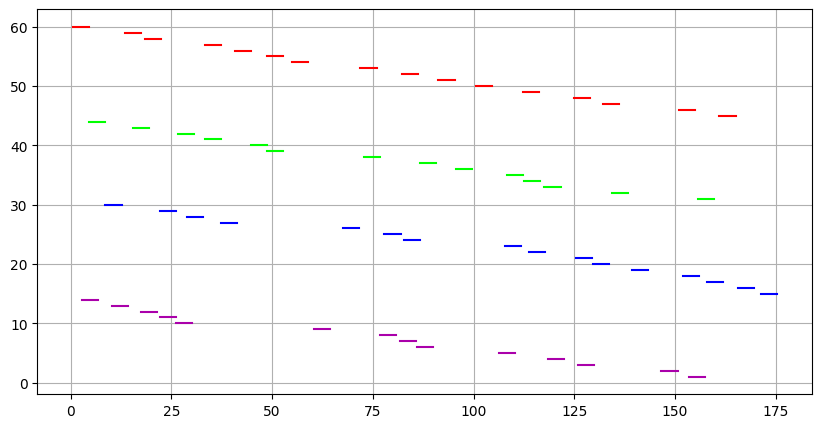

In [ ]:
f = plt.figure(figsize=(10,5))
ax = f.add_subplot()

colors = ['#FF0000', '#00FF00', '#0000FF', '#AA00AA']
j=n
for k in range(1,m+1):
  for_crane = min_schedling[0][min_schedling[0]['Y']==k][['S','D']]
  for_crane.index = np.arange(len(for_crane))
  for i in range(len(for_crane)):
    x = for_crane.iloc[i]
    y = [j, j]
    ax.plot(x, y, c = colors[k-1])
    j=j-1
ax.grid(which='both')

Проверка, что межкранового взаимодействия нет:

In [ ]:
data_individ = min_schedling[0]
for i in range(len(data_individ)-1):
  for j in range(i+1, len(data_individ)):
    if data_individ.iloc[i]['D'] > data_individ.iloc[j]['S'] and (data_individ.iloc[i]['Y']-data_individ.iloc[j]['Y'])*(data_individ.iloc[i]['l']-data_individ.iloc[j]['l'])<=0:
      print('Межкрановое взаимодействие')